In [1]:
%load_ext autoreload
%autoreload
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
df_in = pd.read_csv('chicago_taxi.csv')
df_in.head()
df_in = df_in.sample(n=100000)

In [3]:
df_in.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 103623 to 220946
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Trip ID                     100000 non-null  object 
 1   Taxi ID                     99993 non-null   object 
 2   Trip Start Timestamp        100000 non-null  object 
 3   Trip End Timestamp          99999 non-null   object 
 4   Trip Seconds                99991 non-null   float64
 5   Trip Miles                  99999 non-null   float64
 6   Pickup Census Tract         63143 non-null   float64
 7   Dropoff Census Tract        62881 non-null   float64
 8   Pickup Community Area       93230 non-null   float64
 9   Dropoff Community Area      91240 non-null   float64
 10  Fare                        99990 non-null   float64
 11  Tips                        99990 non-null   float64
 12  Tolls                       99990 non-null   float64
 13  Extras   

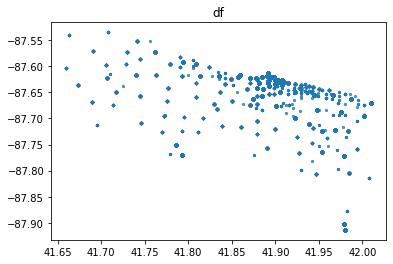

array([[ 41.89250778, -87.62621491],
       [ 42.00962288, -87.67016686],
       [ 41.89833179, -87.62076287],
       ...,
       [ 41.92268628, -87.64948873],
       [ 41.89092203, -87.61886836],
       [ 41.88099447, -87.63274649]])

In [4]:
X = df_in[["Pickup Centroid Latitude","Pickup Centroid Longitude"]].to_numpy()

X_no_nan = X[~np.isnan(X).any(axis=1),:]

plt.scatter(df_in["Pickup Centroid Latitude"],df_in["Pickup Centroid Longitude"], s=5, alpha=0.75)
plt.title('df')
plt.show()

X_no_nan


## Preprocessing data

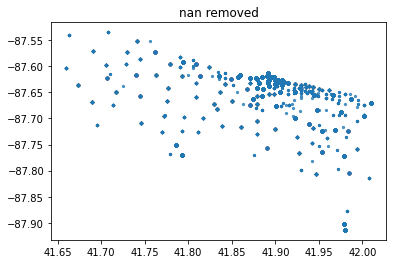

In [5]:
plt.scatter(X_no_nan[:,0],X_no_nan[:,1], s=5, alpha=0.75)
plt.title('nan removed')
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled  = scaler.fit_transform(X_no_nan)

x_scaled_df = pd.DataFrame(x_scaled)
x_scaled_df

,0,1
0,-0.120922,0.464106
1,2.575681,-0.062424
2,0.013178,0.529419
3,1.872212,-2.852161
4,-0.062768,0.542024
...,...,...
93230,-0.294085,0.526663
93231,-0.386018,0.385859
93232,0.573945,0.185293
93233,-0.157434,0.552115


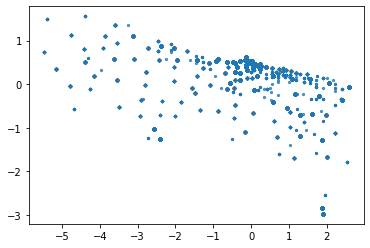

In [7]:
plt.scatter(x_scaled_df[0],x_scaled_df[1], s=5, alpha=0.75)
plt.show()

In [8]:
pca = PCA(n_components=2)
x_principal = pca.fit_transform(x_scaled_df)
x_principal = pd.DataFrame(x_principal)
x_principal.columns= ['P1','P2']
x_principal.head()

,P1,P2
0,0.413677,-0.242668
1,-1.865422,-1.777141
2,0.365038,-0.383674
3,-3.340637,0.692929
4,0.427652,-0.338886


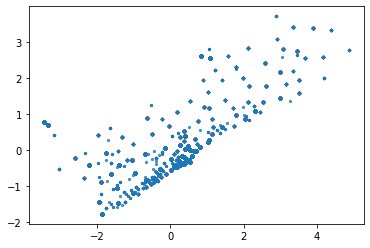

In [9]:
plt.scatter(x_principal['P1'],x_principal['P2'], s=5, alpha=0.75)
plt.show()

In [10]:
db = DBSCAN(eps=0.1, min_samples=5, n_jobs=4)

In [11]:
db.fit(x_principal)
db.labels_

array([ 0,  1,  0, ..., 23,  0,  7])

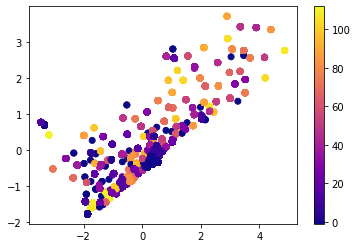

In [12]:
color_clusters = db.fit_predict(x_principal)
plt.scatter(x_principal['P1'], x_principal['P2'], c=color_clusters, cmap='plasma')
plt.colorbar()